In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()
X, y = data.data, data.target

In [21]:
X = X[:, :2]

In [22]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [23]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train

array([[ 9.029, 17.33 ],
       [21.09 , 26.57 ],
       [ 9.173, 13.86 ],
       [10.65 , 25.22 ],
       [10.17 , 14.88 ],
       [14.54 , 27.54 ],
       [14.41 , 19.73 ],
       [11.43 , 15.39 ],
       [12.25 , 17.94 ],
       [19.89 , 20.26 ],
       [12.36 , 21.8  ],
       [21.1  , 20.52 ],
       [14.87 , 16.67 ],
       [ 9.667, 18.49 ],
       [13.4  , 16.95 ],
       [19.27 , 26.47 ],
       [17.99 , 10.38 ],
       [15.22 , 30.62 ],
       [14.26 , 18.17 ],
       [11.7  , 19.11 ],
       [15.27 , 12.91 ],
       [15.34 , 14.26 ],
       [13.51 , 18.89 ],
       [10.48 , 19.86 ],
       [14.64 , 15.24 ],
       [14.45 , 20.22 ],
       [11.04 , 16.83 ],
       [19.81 , 22.15 ],
       [10.26 , 12.22 ],
       [12.89 , 13.12 ],
       [13.4  , 20.52 ],
       [12.96 , 18.29 ],
       [17.75 , 28.03 ],
       [20.58 , 22.14 ],
       [15.28 , 22.41 ],
       [13.78 , 15.79 ],
       [15.1  , 22.02 ],
       [12.34 , 14.95 ],
       [ 8.196, 16.84 ],
       [13.45 , 18.3  ],


In [27]:
X_test

array([[12.47 , 18.6  ],
       [18.94 , 21.31 ],
       [15.46 , 19.48 ],
       [12.4  , 17.68 ],
       [11.54 , 14.44 ],
       [20.6  , 29.33 ],
       [22.01 , 21.9  ],
       [17.57 , 15.05 ],
       [13.34 , 15.86 ],
       [13.9  , 16.62 ],
       [13.21 , 25.25 ],
       [16.78 , 18.8  ],
       [14.97 , 19.76 ],
       [16.26 , 21.88 ],
       [12.34 , 12.27 ],
       [19.1  , 26.29 ],
       [14.81 , 14.7  ],
       [10.16 , 19.59 ],
       [ 6.981, 13.43 ],
       [20.55 , 20.86 ],
       [13.8  , 15.79 ],
       [12.1  , 17.72 ],
       [21.61 , 22.28 ],
       [10.03 , 21.28 ],
       [11.6  , 24.49 ],
       [13.53 , 10.94 ],
       [13.28 , 13.72 ],
       [10.29 , 27.61 ],
       [12.76 , 18.84 ],
       [17.2  , 24.52 ],
       [11.13 , 22.44 ],
       [12.06 , 12.74 ],
       [ 9.742, 19.12 ],
       [13.68 , 16.33 ],
       [10.18 , 17.53 ],
       [11.52 , 18.75 ],
       [16.02 , 23.24 ],
       [11.74 , 14.02 ],
       [18.25 , 19.98 ],
       [14.62 , 24.02 ],


In [28]:
y_train

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [29]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[-1.44075296e+00, -4.35319470e-01],
       [ 1.97409619e+00,  1.73302577e+00],
       [-1.39998202e+00, -1.24962228e+00],
       [-9.81796783e-01,  1.41622208e+00],
       [-1.11769991e+00, -1.01025950e+00],
       [ 1.19584794e-01,  1.96065509e+00],
       [ 8.27776975e-02,  1.27887086e-01],
       [-7.60954205e-01, -8.90578102e-01],
       [-5.28786366e-01, -2.92171137e-01],
       [ 1.63433838e+00,  2.52261867e-01],
       [-4.97641900e-01,  6.13652740e-01],
       [ 1.97692750e+00,  3.13275910e-01],
       [ 2.13018192e-01, -5.90201273e-01],
       [-1.26011506e+00, -1.63102968e-01],
       [-2.03185128e-01, -5.24493841e-01],
       [ 1.45879684e+00,  1.70955883e+00],
       [ 1.09638851e+00, -2.06627179e+00],
       [ 3.12114221e-01,  2.68343683e+00],
       [ 4.03079709e-02, -2.38197175e-01],
       [-6.84508697e-01, -1.76079412e-02],
       [ 3.26270797e-01, -1.47255821e+00],
       [ 3.46090003e-01, -1.15575452e+00],
       [-1.72040662e-01, -6.92352088e-02],
       [-1.

In [32]:
X_test

array([[-0.46649743, -0.13728933],
       [ 1.36536344,  0.49866473],
       [ 0.38006578,  0.06921974],
       [-0.48631664, -0.35318518],
       [-0.72980974, -1.11351403],
       [ 1.83536175,  2.38071331],
       [ 2.23457718,  0.63711968],
       [ 0.97747327, -0.9703657 ],
       [-0.22017302, -0.78028349],
       [-0.06161937, -0.60193474],
       [-0.25698012,  1.42326216],
       [ 0.75379938, -0.09035545],
       [ 0.24133134,  0.13492717],
       [ 0.60657099,  0.63242629],
       [-0.50330453, -1.62274662],
       [ 1.41066448,  1.66731834],
       [ 0.1960303 , -1.05249999],
       [-1.12053122,  0.09503337],
       [-2.0206063 , -1.35053012],
       [ 1.82120517,  0.39306351],
       [-0.08993252, -0.79671034],
       [-0.57125609, -0.3437984 ],
       [ 2.12132458,  0.72629405],
       [-1.15733832,  0.49162465],
       [-0.71282185,  1.24491342],
       [-0.16637803, -1.93485692],
       [-0.23716091, -1.282476  ],
       [-1.08372413,  1.97708194],
       [-0.3843893 ,

# Training SVM with linear and RBF kernals

In [33]:
linear_svm = SVC(kernel="linear", C=1)
linear_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [34]:
rbf_svm = SVC(kernel="rbf", C=1, gamma="scale")
rbf_svm.fit(X_train, y_train)


SVC(C=1)

# Decision Boundaries

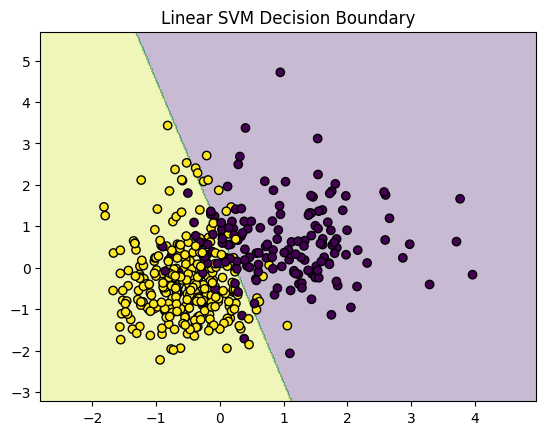

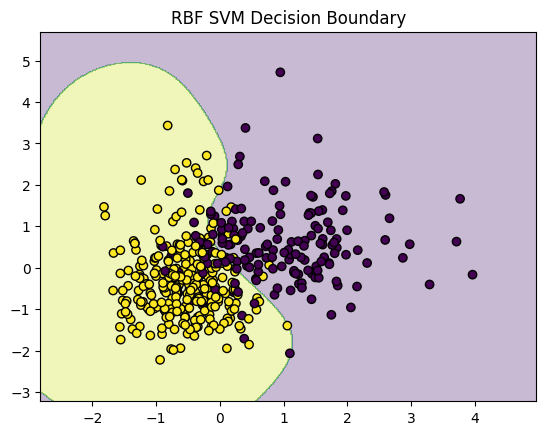

In [36]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X_train, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X_train, y_train, "RBF SVM Decision Boundary")


# Hyperparameter Tunning

In [37]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.1, 1, 10]
}

grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1}


# Cross Validaton

In [38]:
scores = cross_val_score(SVC(kernel="rbf", C=grid.best_params_['C'], gamma=grid.best_params_['gamma']),
                         X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.887532991771464
